In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
from rdkit import Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs

In [342]:
import sys
sys.setrecursionlimit(50000)

In [343]:
mols = Chem.MultithreadedSDMolSupplier('./119697.sdf', numWriterThreads=10)

In [344]:
mols = [m for m in mols]

In [897]:
df = pd.read_csv("fingerprints_119697.txt", sep=" ", names=['id', 'fingerprint'], index_col=0)

In [898]:
def bin_format(number, num_of_bits=3736):
    return list(map(int, list(bin(int(number, 16))[2:].zfill(num_of_bits))))

In [899]:
df['fingerprint'] = df['fingerprint'].apply(bin_format)

In [7]:
split_df = pd.DataFrame(df['fingerprint'].tolist())

In [8]:
split_df.to_csv('fingerprints.csv')

In [216]:
split_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3726,3727,3728,3729,3730,3731,3732,3733,3734,3735
0,0,0,1,0,1,1,1,1,0,0,...,1,1,0,0,1,1,1,1,1,1
1,0,1,1,0,1,1,1,1,0,0,...,1,1,0,1,0,1,0,0,1,1
2,0,0,0,1,1,0,0,0,0,0,...,1,0,1,1,1,1,1,0,0,1
3,0,1,1,0,1,1,1,1,0,0,...,1,1,0,0,0,1,0,1,1,1
4,0,1,1,0,1,1,1,1,0,0,...,1,1,0,1,0,1,0,1,1,1


In [8]:
# df_5000 = df.sample(n=50000)
df_5000 = df

In [16]:
df_5000.fingerprint

id
26000020    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26000026    [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26000033    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
26000039    [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26000046    [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
                                  ...                        
26499992    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26499994    [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26499995    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26499999    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26500000    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: fingerprint, Length: 119697, dtype: object

In [9]:
from sklearn.decomposition import PCA

In [10]:
X = df_5000.fingerprint.to_list()

In [55]:
pca = PCA(n_components=1000)
pca.fit(X)

PCA(n_components=1000)

In [56]:
X_pca = pca.fit_transform(X)

In [23]:
from sklearn.cluster import KMeans

In [61]:
sse = []
ks = range(1, 100, 10)
for k in ks:
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_pca)
    sse.append(np.sqrt(kmeans.inertia_))

1
11
21
31
41
51
61
71
81
91


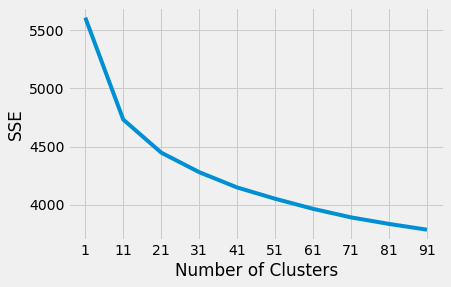

In [62]:
plt.style.use("fivethirtyeight")
plt.plot(ks, sse)
plt.xticks(ks)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Solution using KD Tree

In [12]:
tree = KDTree(X, leaf_size=2)              

In [189]:
# query_ind = 32985
query_ind = 10500
k = 5

In [190]:
dist, ind = tree.query([X[query_ind]], k=k*k)   

(array([1., 0., 0., 1., 1., 1., 4., 8., 2., 6.]),
 array([16.82260384, 17.11518522, 17.4077666 , 17.70034799, 17.99292937,
        18.28551075, 18.57809213, 18.87067351, 19.16325489, 19.45583628,
        19.74841766]),
 <BarContainer object of 10 artists>)

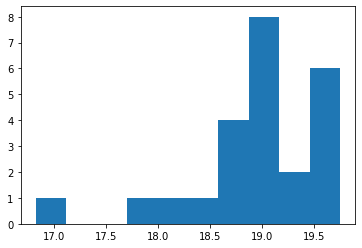

In [191]:
plt.hist(dist[0][1:])

In [192]:
imgs = [Chem.Draw.MolToImage(mols[i]) for i in ind[0]]

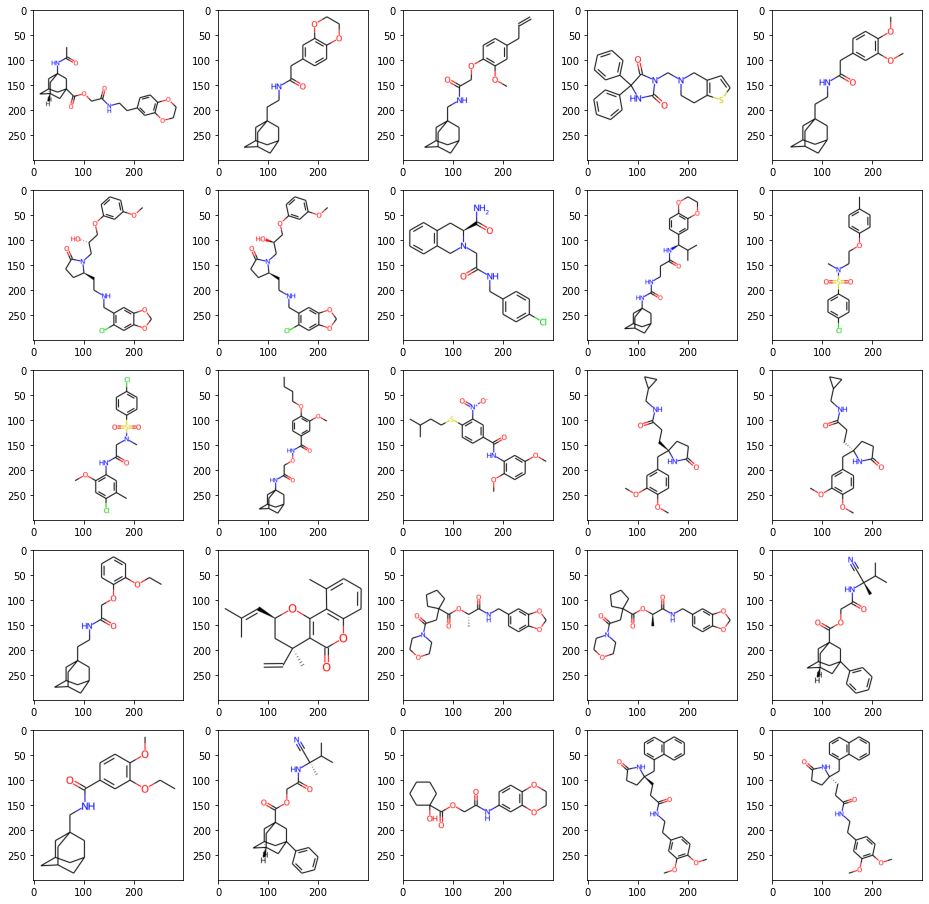

In [193]:
_, axs = plt.subplots(k, k, figsize=(16, 16))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()

In [158]:
np.argmin([m.GetNumAtoms() for m in mols if m])

119245

(array([   47.,   295.,  1159.,  2127.,  9471., 17514., 37234., 28262.,
        21617.,  1971.]),
 array([ 5. ,  8.5, 12. , 15.5, 19. , 22.5, 26. , 29.5, 33. , 36.5, 40. ]),
 <BarContainer object of 10 artists>)

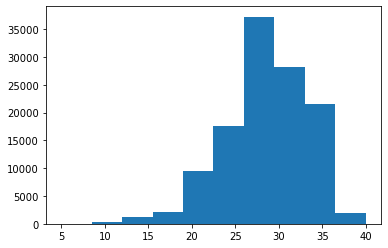

In [169]:
plt.hist([m.GetNumAtoms() for m in mols if m])

UnboundLocalError: local variable 'content' referenced before assignment

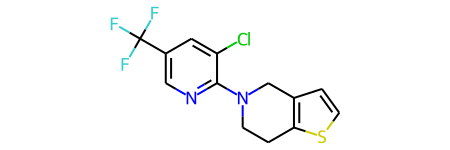

In [207]:
mols[10507]

# Build tree for searching

In [3]:
split_df = pd.read_csv("fingerprints.csv", index_col=0)

In [576]:
df = split_df.sample(n=10000)

In [577]:
df = df.T.drop_duplicates().T

In [699]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3726,3727,3728,3729,3730,3731,3732,3733,3734,3735
108026,0,0,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,0,1
103297,0,0,0,1,1,1,1,1,0,0,...,1,0,0,1,1,0,0,0,1,1
49468,0,0,1,1,1,1,1,1,0,0,...,1,0,0,1,1,0,0,1,1,1
1567,0,0,0,1,1,1,1,1,0,0,...,1,0,1,1,1,0,0,1,0,1
33481,0,0,0,0,0,1,1,1,0,0,...,1,1,0,1,0,1,0,1,1,1


In [764]:
LEAF_IND = -1 

In [888]:
class Tree:
    def __init__(self, ind, left, right, df_index):
        self.ind = ind
        self.left = left
        self.right = right
        self.df_index = df_index
        
    def __iter__(self):
        return self.preorder
    
    def is_leaf(self):
        return self.ind == LEAF_IND
    
    @property
    def preorder(self):
        if self.left:
            yield from self.left
        yield self
        if self.right:
            yield from self.right
            
    def search(self, fingerprint):
        if self.is_leaf():
            return self.df_index
        print(self.ind, fingerprint.loc[self.ind])
        if fingerprint.loc[self.ind] == 1:
            if self.right:
                return self.right.search(fingerprint)
            return pd.Index()
        left_index = self.left.search(fingerprint)
        right_index = self.right.search(fingerprint)
        return left_index.union(right_index)

In [890]:
def split_by_mean(df_index, used_ind, value_to_split=0.5):
    sv = df.loc[df_index, ~df.columns.isin(used_ind)].mean().sort_values()
    ind_to_split = sv.idxmin() #sv.index[sv.searchsorted(sv.max() * value_to_split)]
    col_values = df.loc[df_index, ind_to_split]
    df_index_0 = df_index[col_values == 0]
    df_index_1 = df_index[col_values == 1]
    return df_index_0, df_index_1, ind_to_split

In [891]:
def build_tree(df_index, batch_size, used_ind, value_to_split=0.5, depth=100):
    if df_index.size <= batch_size or depth == 0:
        return Tree(LEAF_IND, None, None, df_index)
    df_index_0, df_index_1, ind_to_split = split_by_mean(df_index, used_ind, value_to_split)
    used_ind.append(ind_to_split)
    left = build_tree(df_index_0, batch_size, list(used_ind), value_to_split, depth - 1)
    right = build_tree(df_index_1, batch_size, list(used_ind), value_to_split, depth - 1)
    return Tree(ind_to_split, left, right, None)

In [892]:
%%time
tree = build_tree(df.index, 3, [], 0.1, 2000)

CPU times: user 7min 15s, sys: 1.69 s, total: 7min 17s
Wall time: 7min 17s


In [893]:
%%time
result = tree.search(fingerprint)

8 0
0 0
3623 0
3514 0
3085 0
3593 0
3541 0
3427 0
3061 0
3363 0
2984 0
3576 0
2976 0
3560 0
2964 0
3614 0
3093 0
3482 0
2897 0
3645 0
3508 0
3145 0
3418 0
3192 0
3565 0
2858 0
3220 0
3709 0
3685 0
3619 0
3374 0
3322 0
3258 0
3234 0
3208 0
2925 0
3295 0
3664 0
3604 0
3326 0
3198 0
3143 0
3711 0
3589 0
3097 0
3474 0
3463 0
3284 0
3299 0
2850 0
3475 0
3142 0
3530 0
3666 0
231 0
2907 0
2805 0
3573 0
582 0
3173 0
3601 0
521 0
2982 0
3671 0
108 0
3087 0
3368 0
3017 0
3516 0
3719 0
3696 0
3512 0
3034 0
1403 0
3111 0
3073 0
3538 0
3286 0
2788 1
311 0
3592 0
1046 0
2866 0
253 0
2837 0
3162 0
3046 0
3557 0
1442 0
3622 0
3055 0
1116 0
3699 0
3535 0
2917 0
998 0
1321 0
1133 0
204 0
2926 0
1289 0
3465 0
2919 0
466 0
1598 0
3367 0
3032 0
3329 0
14 0
3690 0
3323 0
697 0
3135 0
490 0
154 0
873 0
3240 0
1395 0
3343 0
3421 0
1068 0
1128 0
3629 0
1423 0
1336 0
1266 0
937 0
1274 0
3119 0
3515 0
1286 0
893 0
1027 0
3510 0
3637 0
3172 0
701 0
3378 0
2967 0
25 0
3524 0
3018 0
222 0
3048 0
790 0
2983 0
3007 0

258 0
502 0
716 0
1143 0
3314 0
1023 0
2853 0
3024 0
568 0
3449 0
116 0
686 0
1395 0
2784 0
893 0
838 0
873 0
307 0
1336 0
135 0
943 0
891 0
2837 0
622 0
1358 0
753 0
820 0
155 0
3538 0
1505 0
113 0
3286 0
3308 0
998 0
3034 0
1596 0
425 0
1117 0
813 0
3708 0
326 0
3701 0
737 0
910 0
423 0
3487 0
256 0
260 0
644 0
1169 0
85 0
3240 0
630 0
3101 0
1088 0
950 0
460 0
790 0
3493 0
909 0
228 0
56 0
3405 0
3669 0
1372 0
153 0
2780 0
857 0
479 0
651 0
559 0
452 0
2794 0
2974 0
830 0
1243 0
2900 0
3440 0
689 0
1266 0
1286 0
3548 0
3291 0
123 0
3221 0
1341 0
3485 0
1129 0
3341 0
3612 0
3171 0
629 0
1567 0
836 0
133 0
1050 0
1362 0
1365 0
1408 0
3114 0
1418 0
1419 0
1124 0
3465 0
1346 0
742 0
887 0
885 0
681 0
436 0
437 0
702 0
3055 0
698 0
2978 0
2861 0
1128 0
3005 0
861 0
1274 0
496 0
1583 0
90 0
384 0
3343 0
2928 0
210 0
121 0
964 0
110 0
337 0
3529 0
9 0
497 0
3647 0
937 0
3515 0
1321 0
46 0
3364 0
1382 0
1312 0
3012 0
1035 0
2886 0
947 0
3254 0
1158 0
3278 0
993 0
466 0
12 0
463 0
255 0
1364

3087 0
3719 0
3708 0
3592 0
3368 0
2788 1
1 0
3535 0
3142 0
3651 0
3592 0
466 0
3557 0
3601 0
3173 0
2982 0
3046 0
1581 0
2962 0
3260 0
3286 0
502 0
3119 0
1572 0
2805 0
1415 0
1414 0
3367 0
3032 0
3578 0
1567 0
1563 0
3548 0
2802 0
3005 0
3017 0
3368 0
3087 0
3398 0
3516 0
998 0
3530 0
2866 0
2991 0
1289 0
1403 0
1116 0
1616 0
910 0
587 1
3087 0
3017 0
624 0
1169 0
338 0
3111 0
2850 0
701 0
3034 0
1116 0
3368 0
361 0
3173 0
3475 0
3530 0
3651 0
1206 0
3699 0
3524 0
3329 0
3592 0
813 0
1336 0
3601 0
793 0
1156 0
3142 0
199 0
1414 0
3119 0
3515 0
3587 0
3708 0
231 0
2805 0
3666 0
2926 0
3312 0
190 0
3018 0
2853 0
466 0
582 0
3718 0
3399 0
3379 0
2866 0
1598 0
2937 0
514 0
204 0
2788 1
2982 0
2981 0
2967 0
3592 0
3073 0
1136 0
2874 0
3142 0
3449 0
2805 0
3378 0
2853 0
3573 0
1116 0
1321 0
3622 0
2788 1
2879 0
1442 0
3368 0
253 0
3017 0
1321 0
689 0
3524 0
3535 0
1286 0
3405 0
582 0
3312 0
2962 0
3087 0
2932 0
2801 0
3651 0
3044 0
3515 0
178 0
123 0
3111 0
3073 0
3046 0
3578 0
3260 0
271 

3286 0
135 0
2837 0
418 0
2896 0
2879 0
2872 0
220 0
1358 0
582 0
3275 0
2962 0
3592 0
3510 0
3465 0
3178 0
3699 0
3378 0
2967 0
1372 0
3674 0
3048 0
1346 0
256 0
3293 0
190 0
3160 0
3277 0
2932 0
3221 0
2965 0
3622 0
2895 0
3173 0
1218 0
704 0
2978 0
3240 0
1563 0
3005 0
466 0
3664 0
3295 0
1194 0
1321 0
3578 0
3732 0
681 0
1609 0
3260 0
3180 0
508 0
2801 0
3515 0
3637 0
91 0
3300 0
376 0
3044 0
2878 0
3341 0
3497 0
882 0
1535 0
538 0
775 0
905 0
1226 0
1286 0
790 0
3065 0
1365 0
2864 0
897 0
1151 0
1228 0
2917 0
1340 0
2850 0
3021 0
199 0
222 0
3651 0
710 0
3711 0
1143 0
3582 0
826 0
33 0
1023 0
2853 0
3101 0
428 0
1015 0
860 0
386 0
692 0
881 0
3055 0
477 0
998 0
3399 0
1617 0
2998 0
1014 0
3122 0
1565 0
1006 0
3205 0
3141 0
1431 0
2953 0
3406 0
781 0
2915 0
3586 0
3358 0
1586 0
43 0
3305 0
3710 0
3479 0
633 0
3609 0
480 0
3108 0
1264 0
1520 0
715 0
1491 0
3551 0
1003 0
271 0
722 0
3573 0
1243 0
3171 0
2816 0
3537 0
1567 0
3086 0
2865 0
197 0
61 0
3056 0
878 0
1157 0
1293 0
100 0
79

463 0
1478 0
3490 0
3486 0
3355 0
3254 0
2834 0
1244 0
3666 0
153 0
686 0
442 0
3113 0
2937 0
3315 0
537 0
2879 0
948 0
3291 0
1185 0
1120 0
1473 0
2794 0
2872 0
3641 0
3719 0
3440 0
2878 0
514 0
1312 0
3647 0
988 0
3025 0
3728 0
1362 0
1112 0
1472 0
1305 0
151 0
50 0
3379 0
3399 0
3457 0
1461 0
1376 0
401 0
77 0
663 0
849 0
130 0
1293 0
909 0
3373 0
70 0
3162 0
2981 0
1209 0
1623 0
89 0
1596 0
1124 0
699 0
1346 0
905 0
775 0
1297 0
887 0
28 0
1073 0
361 0
967 0
1589 0
1275 0
631 0
1527 0
155 0
251 0
525 0
1410 0
1415 0
2901 0
546 0
2851 0
1149 0
3682 0
1348 0
84 0
1560 0
3458 0
218 0
510 0
568 0
859 0
496 0
611 0
947 0
3056 0
1176 0
1455 0
716 0
723 0
1343 0
805 0
1416 0
810 0
312 0
597 0
466 0
374 1
3711 0
3651 0
3666 0
3322 0
2982 0
3515 0
3428 0
3719 0
2872 0
3425 0
1442 0
2962 0
3198 0
3143 0
2794 0
3548 0
2896 0
231 0
3097 0
3142 0
3463 0
2900 0
1519 0
3295 0
458 0
3351 0
3399 0
3485 0
3270 0
3208 0
648 0
3087 0
97 0
338 0
3291 0
3718 0
3017 0
253 0
521 0
689 0
624 0
3254 0
3355 

3685 0
3508 0
3367 0
3379 0
3234 0
477 0
3467 0
3342 0
2892 0
582 0
3565 0
3463 0
3374 0
2805 0
2874 0
3145 0
2788 1
231 0
3709 0
830 0
2937 0
3056 0
3368 0
2895 0
2897 0
2932 0
3173 0
3557 0
3671 0
3192 0
3024 0
3119 0
3097 0
3367 0
3284 0
3374 0
910 0
3073 0
3645 0
3322 0
1403 0
1367 0
3234 0
893 0
3508 0
3711 0
3145 0
948 0
3319 0
3474 0
3696 0
1598 0
3326 0
3589 0
466 0
3651 0
1585 0
1023 0
3449 0
998 0
1390 0
3201 0
568 0
3046 0
1395 0
3708 0
3612 0
2951 0
3393 0
3025 0
3497 0
2878 0
2866 0
3034 0
3463 0
2900 0
3512 0
3086 0
3732 0
3180 0
3017 0
3429 0
3143 0
3690 0
1336 0
2850 0
276 0
748 0
1286 0
514 0
415 0
3608 0
3532 0
3466 0
2958 0
136 0
937 0
3260 0
3679 0
3050 0
3227 0
3719 0
3157 0
1410 0
3407 0
408 0
1324 0
1032 0
3619 0
1545 0
3626 0
3221 0
1519 0
1152 0
3299 0
3142 0
3467 0
123 0
738 0
3399 0
3440 0
3337 0
3404 0
3398 0
3452 0
631 0
3718 0
2794 0
458 0
3371 0
428 0
710 0
1567 0
3701 0
753 0
515 0
1298 0
1408 0
1266 0
655 0
1124 0
261 0
1341 0
2801 0
1596 0
1146 0
1535 

3087 0
830 0
3508 0
220 0
3143 0
3234 0
2982 0
3427 0
3322 0
3614 0
2801 0
3515 0
2964 0
3046 0
689 0
3145 0
178 0
1144 0
2897 0
97 0
3651 0
231 0
654 0
3398 0
3337 0
3202 0
695 0
2788 1
1415 0
423 0
2982 0
777 0
3254 0
3512 0
3119 0
3576 0
3535 0
681 0
3664 0
3208 0
1509 0
2984 0
2874 0
2858 0
2788 1
3145 0
3645 0
2976 0
3551 0
1286 0
716 0
2982 0
723 0
3467 0
3234 0
1390 0
1158 0
2896 0
220 0
3475 0
3398 0
231 0
3258 0
74 0
2788 1
1129 0
2964 0
3198 0
3208 0
3622 0
1505 0
502 0
3557 0
3709 0
2897 0
3227 0
3645 0
2825 0
418 0
3061 0
2976 0
97 0
3554 0
3192 0
3427 0
3178 0
3260 0
376 0
3573 0
3085 0
1566 0
3234 0
3664 0
1365 0
1415 0
272 0
1038 0
722 0
2858 0
3322 0
3541 0
3637 0
1073 0
1105 0
3530 0
3560 0
3593 0
3158 0
1209 0
2991 0
2981 0
3519 0
1596 0
1103 0
3589 0
3463 0
3097 0
3663 0
2974 0
998 0
78 0
2937 0
3449 0
2958 0
568 0
584 0
3601 0
2984 0
2907 0
3504 0
689 0
258 0
3713 0
3046 0
3428 0
3341 0
3619 0
2983 0
3134 0
177 0
2926 0
882 0
3333 0
2873 0
3119 0
648 0
798 0
1445 0


In [896]:
result.size

1383

In [885]:
result

Int64Index([    50,     54,     94,     99,    111,    121,    228,    257,
               275,    291,
            ...
            118760, 118801, 118816, 118828, 118861, 118924, 118938, 119211,
            119273, 119462],
           dtype='int64', length=1383)

In [857]:
def f(x):
    return sum(x & fingerprint)

In [884]:
%%time
answer = df.loc[result].apply(f, axis=1).nlargest(20)

CPU times: user 4.71 s, sys: 27.4 ms, total: 4.74 s
Wall time: 4.74 s


# Build fingerprint from smiles

In [460]:
from indigo import Indigo

In [477]:
indigo_sdf = Indigo().iterateSDFile('./119697.sdf')

In [478]:
first = next(indigo_sdf)

In [510]:
smiles_to_test = 'NCCc1ccc4c(c1)OCCO4'

In [511]:
m = Chem.MolFromSmiles(smiles_to_test)

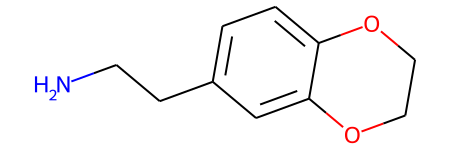

In [512]:
m

In [592]:
indigo_mol_to_test = Indigo().loadMolecule(smiles_to_test)

In [1014]:
%%time
fingerprint = pd.Series(bin_format(indigo_mol_to_test.fingerprint("sub").toString()))

CPU times: user 1.7 ms, sys: 967 µs, total: 2.66 ms
Wall time: 1.87 ms


In [594]:
fingerprint.index = fingerprint.index.astype(str)

In [646]:
fingerprint[fingerprint == 1].index

Index(['32', '38', '39', '41', '45', '47', '53', '54', '58', '82',
       ...
       '3694', '3698', '3703', '3705', '3726', '3727', '3731', '3733', '3734',
       '3735'],
      dtype='object', length=556)

# Hashing

In [938]:
split_df = pd.read_csv("fingerprints.csv", index_col=0)

In [945]:
split_df = split_df.reindex(split_df.mean().sort_values(ascending=False).index, axis=1)

In [946]:
split_df

,594,2903,2799,1620,2871,3571,3347,3264,3327,3579,...,8,2771,17,2772,2773,2774,2775,2769,16,1867
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119692,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
119693,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
119694,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
119695,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [978]:
df = split_df.sample(n=1000)

In [979]:
df = df.T.drop_duplicates().T

In [980]:
def to_hash(bin_fingerprint):
    bit_chunks = np.array_split(bin_fingerprint, len(bin_fingerprint) // 32)
    num_chunks = map(lambda x: int("".join(map(str, x)), 2), bit_chunks)
    return list(num_chunks)

In [981]:
df['fingerprint'] = df.apply(to_hash2, axis = 1)

In [982]:
df = pd.DataFrame(df['fingerprint'].tolist())

In [1002]:
df

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,8589934591,8589934591,8589934591,8589934591,8589934591,8589934550,8589934071,8573157363,4226019312,872413381,...,1210066944,4206656,4194304,1048576,524288,0,570949632,32,2281701376,0
1,8589934591,8589934591,8589934591,8589934591,8589934591,8589934591,8589803519,8589934591,8587837437,7511461887,...,8388864,69730304,524288,32,1048834,22528,8,0,0,0
2,8589934591,8589934591,8589934591,8589934591,8589934591,8589934591,8589934591,8589934591,8589869055,8522823661,...,3149824,4325376,1073741956,67111136,134217728,268435456,0,147456,0,0
3,8589934591,8589934591,8589934591,8589934591,8589869055,8589934591,8053062591,7497313791,7846866539,4971085051,...,1073741824,0,0,0,536870912,0,0,0,0,0
4,8589934591,8556380159,8589934591,6173982719,8581525421,4457916639,6384495871,6252303282,7398582708,7243269744,...,2147755008,16793856,538050561,2186289220,268438016,8912900,1310720,25231360,21504,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8589934591,8589934591,8589934590,8589934591,8589664255,8589934527,8589934591,8573157325,8514428635,441106362,...,134219888,68288529,1141932048,2236440,268568598,1073774592,67108864,268435456,0,0
996,8589934591,8589934591,8589934591,8589934591,8589934591,8589934591,8589803519,8589934527,8589934463,3220963327,...,1142103857,537919488,1204093075,469926184,3495952433,1086697508,1769251843,2299873280,75498496,135266304
997,8589934591,8589934591,8589934591,8589934591,8589934591,8589934575,8052932605,4286011391,7499317116,8589791094,...,134808592,25864265,16779264,39854104,80020104,268500996,135267872,0,512,0
998,8589934591,8589934591,8589934591,8589934591,8589934591,8589934591,8589934591,8589934573,8589926399,8053063615,...,4194432,524416,12320,133632,268435456,0,0,2147483648,0,0


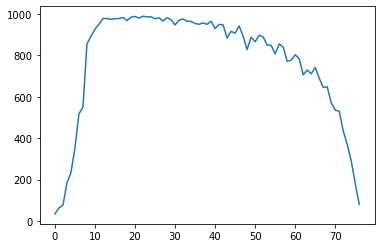

In [1000]:
plt.plot(df.apply(set).apply(len))

In [1013]:
df.groupby([0, 1, 3, 75, 76]).size().values.size

451